# Introdução à Automatização de Processos com Python

A automatização de processos é uma das aplicações mais poderosas e práticas da linguagem Python, especialmente no contexto empresarial e acadêmico. Ela permite transformar tarefas repetitivas e manuais em rotinas automáticas, que economizam tempo, reduzem erros humanos e aumentam a produtividade.

Com Python, podemos automatizar desde operações simples, como mover arquivos e ler planilhas, até tarefas mais complexas, como processar dados em larga escala, enviar e-mails automaticamente ou se conectar com APIs externas.

---

## Por que automatizar?

-  **Eficiência:** tarefas que levariam horas manualmente podem ser executadas em segundos.
-  **Redução de erros:** ao eliminar a intervenção humana em tarefas repetitivas, os erros diminuem.
-  **Escalabilidade:** permite lidar com grandes volumes de dados e tarefas simultâneas.
-  **Repetibilidade:** a mesma ação pode ser executada de forma padronizada quantas vezes for necessário.

---

## Exemplos práticos de processos que podem ser automatizados com Python:

- Leitura e filtragem automática de dados em planilhas Excel
- Geração de relatórios a partir de dados brutos
- Envio automático de e-mails com relatórios ou arquivos
- Backup e organização de arquivos em pastas específicas
- Coleta de dados de sites (web scraping)
- Preenchimento automático de formulários

---

##  Bibliotecas comuns utilizadas:

- `pandas` — manipulação de dados e planilhas
- `openpyxl` — leitura e escrita de arquivos Excel (.xlsx)
- `schedule` — execução de tarefas em horários programados
- `os` e `shutil` — automação de pastas e arquivos no sistema operacional
- `pyautogui` — automação de cliques, digitação e ações na tela
- `selenium` — automação de navegação em páginas web

---

> A seguir, este notebook irá apresentar exemplos práticos e scripts comentados que ilustram como aplicar esses conceitos em situações reais de automação de processos usando Python.


# Biblioteca - Coleta de Dados

## Transformando em Planilha

### Pandas

A biblioteca pandas é uma das mais importantes do Python para manipulação e análise de dados, sendo especialmente útil na automatização de processos que envolvem leitura, transformação e armazenamento de informações estruturadas. Ela permite ler arquivos CSV, Excel, JSON e muitos outros formatos, organizar esses dados em tabelas chamadas DataFrames e realizar operações como filtragem, agrupamento, substituição, ordenação e cálculo estatístico de maneira rápida e eficiente. Em tarefas automatizadas, o pandas é frequentemente utilizado para processar grandes volumes de dados coletados automaticamente da internet, limpá-los e salvar em arquivos organizados para posterior análise, envio ou visualização.

In [4]:

import pandas as pd
df_premier21 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2122/E0.csv')
print(df_premier21.head())


  Div        Date   Time    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  13/08/2021  20:00   Brentford         Arsenal     2     0   H     1   
1  E0  14/08/2021  12:30  Man United           Leeds     5     1   H     1   
2  E0  14/08/2021  15:00     Burnley        Brighton     1     2   A     1   
3  E0  14/08/2021  15:00     Chelsea  Crystal Palace     3     0   H     2   
4  E0  14/08/2021  15:00     Everton     Southampton     3     1   H     0   

   HTAG  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  \
0     0  ...     1.62  0.50      1.75      2.05   1.81   2.13     2.05   
1     0  ...     2.25 -1.00      2.05      1.75   2.17   1.77     2.19   
2     0  ...     1.62  0.25      1.79      2.15   1.81   2.14     1.82   
3     0  ...     1.94 -1.50      2.05      1.75   2.12   1.81     2.16   
4     1  ...     1.67 -0.50      2.05      1.88   2.05   1.88     2.08   

   MaxCAHA  AvgCAHH  AvgCAHA  
0     2.17     1.80     2.09  
1     1.93     2.10     

In [5]:
df_premier21 = df_premier21.rename(columns={'Date':'date',
                                            'HomeTeam':'home_team',
                                            'AwayTeam':'away_team',
                                            'FTHG': 'home_goals',
                                            'FTAG': 'away_goals'})

print(df_premier21.head())

  Div        date   Time   home_team       away_team  home_goals  away_goals  \
0  E0  13/08/2021  20:00   Brentford         Arsenal           2           0   
1  E0  14/08/2021  12:30  Man United           Leeds           5           1   
2  E0  14/08/2021  15:00     Burnley        Brighton           1           2   
3  E0  14/08/2021  15:00     Chelsea  Crystal Palace           3           0   
4  E0  14/08/2021  15:00     Everton     Southampton           3           1   

  FTR  HTHG  HTAG  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  \
0   H     1     0  ...     1.62  0.50      1.75      2.05   1.81   2.13   
1   H     1     0  ...     2.25 -1.00      2.05      1.75   2.17   1.77   
2   A     1     0  ...     1.62  0.25      1.79      2.15   1.81   2.14   
3   H     2     0  ...     1.94 -1.50      2.05      1.75   2.12   1.81   
4   H     0     1  ...     1.67 -0.50      2.05      1.88   2.05   1.88   

   MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA  
0     2.05     2.17     1.80

In [7]:
df_filtrado = df_premier21.iloc[:, 1:7]  # Isso pega as colunas de índice 1 a 6

# Passo 4: Filtrar apenas linhas em que a data contém "08/"
df_filtrado_agosto = df_filtrado[df_filtrado['date'].str.contains('08/')]

# Passo 5: Salvar o novo DataFrame em um CSV separado
df_filtrado_agosto.to_csv('dados_coletados.csv', index=False)

print(df_filtrado_agosto.head())

         date   Time   home_team       away_team  home_goals  away_goals
0  13/08/2021  20:00   Brentford         Arsenal           2           0
1  14/08/2021  12:30  Man United           Leeds           5           1
2  14/08/2021  15:00     Burnley        Brighton           1           2
3  14/08/2021  15:00     Chelsea  Crystal Palace           3           0
4  14/08/2021  15:00     Everton     Southampton           3           1


### Explicando o Codigo

Neste codigo estamos coletando as informações de uma série de jogos de futebol e transformando em um data frame através da bibliotéca Pandas. Com as informações coletadas, filtramos aquilo que achamos de mais relevante para a nossa pesquisa e transformamos em uma planilha de CSV para analise futura.


## Colentando dados automatizados

### schedule

A biblioteca schedule serve para agendar a execução automática de funções em horários ou intervalos específicos, permitindo que um código Python rode sozinho em segundo plano sem a necessidade de intervenção humana. No contexto de automatização de processos, como a coleta de dados de um site que se atualiza constantemente, ela permite definir tarefas como “executar essa função todo dia às 10h” ou “a cada 30 minutos”, garantindo que os dados sejam coletados, processados e salvos de forma recorrente e previsível. Isso torna possível transformar scripts simples em robôs que operam de forma autônoma e programada.

### time


A biblioteca time é usada para controlar pausas e intervalos de execução dentro de scripts Python, sendo especialmente útil em processos automatizados que exigem espera entre tarefas ou ciclos contínuos. No contexto do nosso projeto, ela é usada em conjunto com a biblioteca schedule para manter o programa em funcionamento constante, verificando a cada segundo se chegou o momento de executar a tarefa agendada. Com funções como time.sleep(), conseguimos fazer o script esperar de forma controlada, sem sobrecarregar o sistema, garantindo que a automação funcione de forma estável e no tempo certo.











In [3]:
import yfinance as yf
import schedule
import time

contador = 0
encerrar = False  # flag para parar o loop

def coletar_dados():
    global contador, encerrar

    contador += 1

    acao = yf.Ticker("PETR4.SA")
    dados = acao.info

    nome = dados.get("shortName", "N/A")
    preco = dados.get("regularMarketPrice", "N/A")
    variacao_abs = dados.get("regularMarketChange", "N/A")
    variacao_pct = dados.get("regularMarketChangePercent", "N/A")

    print(f"\n{nome}")
    print(f"Preço atual: R$ {preco}")
    print(f"Variação: {variacao_abs} ({round(variacao_pct, 2)}%)")
    print("-" * 40)

    if contador >= 3:
        print("\n✅ Coleta concluída 3 vezes. Encerrando monitoramento.")
        encerrar = True  # isso vai parar o loop

# Agendar a execução
schedule.every(20).seconds.do(coletar_dados)

print("Iniciando monitoramento automático...\n")

while True:
    schedule.run_pending()
    time.sleep(1)
    if encerrar:
        break  # encerra o loop de forma limpa no Jupyter do VSCode




Iniciando monitoramento automático...


PETROBRAS   PN      N2
Preço atual: R$ 29.75
Variação: 0.3899994 (1.33%)
----------------------------------------

PETROBRAS   PN      N2
Preço atual: R$ 29.75
Variação: 0.3899994 (1.33%)
----------------------------------------

PETROBRAS   PN      N2
Preço atual: R$ 29.74
Variação: 0.37999916 (1.29%)
----------------------------------------

✅ Coleta concluída 3 vezes. Encerrando monitoramento.

PETROBRAS   PN      N2
Preço atual: R$ 29.74
Variação: 0.37999916 (1.29%)
----------------------------------------

✅ Coleta concluída 3 vezes. Encerrando monitoramento.

PETROBRAS   PN      N2
Preço atual: R$ 29.74
Variação: 0.37999916 (1.29%)
----------------------------------------

✅ Coleta concluída 3 vezes. Encerrando monitoramento.


### Explicando o Codigo

Este codigo é uma versão simples do que muitos programadores fazem no mercado financeiro. Estamos usando 3 bibliotecas importantes: yfinance (para acessar os dados financeiros em tempo real), schedule (permitindo agendar as funções para serem executadas a cada 20 segundos) e time (usada para controlar pausas e ciclos de tempo).

Como eu havia comentado, este código é bem simples visto que após 3 coletas, o nosso programa para de rodar. Fiz isso justamente para que o exemplo seja o mais direto possível no que este deseja demonstrar. 

# Bibliotecas - Automatização de Email

## smtplib

A biblioteca smtplib é uma ferramenta nativa do Python usada para enviar e-mails por meio do protocolo SMTP, permitindo que você se conecte a servidores como Gmail, Outlook ou qualquer outro provedor de e-mail e envie mensagens diretamente a partir de scripts automatizados. É uma biblioteca poderosa, mas exige um pouco mais de configuração manual, como autenticação, definição do servidor e da porta, além do tratamento das mensagens em formato bruto.

## email

A biblioteca email, também nativa do Python, complementa o uso do smtplib ao permitir a construção detalhada das mensagens de e-mail. Com ela, é possível adicionar corpo em texto simples ou HTML, incluir anexos, definir remetente, destinatário, assunto e outras partes da estrutura do e-mail de forma organizada, montando o conteúdo da mensagem antes de enviá-la com smtplib.

## yagmail

Já a biblioteca yagmail é uma alternativa mais prática e moderna para enviar e-mails usando contas do Gmail, simplificando muito o processo de autenticação, composição e envio das mensagens. Com ela, é possível enviar e-mails com texto, HTML ou anexos em apenas algumas linhas de código, o que a torna especialmente útil para tarefas rápidas de automação sem precisar lidar com a complexidade das bibliotecas padrão.



In [2]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Dados do remetente (você precisa de uma conta real)
email_remetente = "edgarallan0080@gmail.com"
senha = "fzebnpfpizksigsm"

# Dados do destinatário
email_destinatario = "edgarallan0080@gmail.com"

# Criando a mensagem
mensagem = MIMEMultipart()
mensagem["From"] = email_remetente
mensagem["To"] = email_destinatario
mensagem["Subject"] = "Email via Python!"

# Corpo do e-mail
corpo = "Olá, este é um e-mail enviado automaticamente via Python!"
mensagem.attach(MIMEText(corpo, "plain"))

# Enviando via servidor SMTP do Gmail
with smtplib.SMTP_SSL("smtp.gmail.com", 465) as servidor:
    servidor.login(email_remetente, senha)
    servidor.sendmail(email_remetente, email_destinatario, mensagem.as_string())

print("E-mail enviado com sucesso!")


E-mail enviado com sucesso!


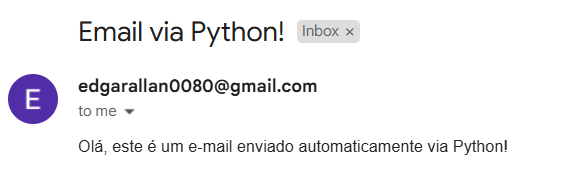

In [3]:
from IPython.display import Image, display

# Caminho para a imagem salva (você pode ajustar conforme o local real)
display(Image(filename="email_enviado.png"))


### Explicando o Código

Interessante notar que a variavel "senha" não é a senha do meu email e sim a senha do APP que eu gerei no "myaccount.google.com/apppasswords" específica para o uso do Python. 

O codigo é bem intuitivo mas gostaria de destacar a parte sobre "mensagem.attach(MIMEText(corpo, "plain"))" no qual o texto do e-mail é colocado como corpo da mensagem, no formato "plain" (texto simples) e com o "attach()", você adiciona esse texto à estrutura "MIMEMultipart".

Por fim, o "smtplib.SMTP_SSL("smtp.gmail.com", 465)" está criando uma conexão segura com o servidor do Gmail e esse 465 é a porta SSL (estabelecem conexões seguras entre clientes e servidores).

# Bibliotecas - Web Scraping

## Beautiful Soap

Beautifulsoup4 é uma biblioteca do Python usada para extrair e manipular dados de arquivos HTML e XML, facilitando a navegação pela estrutura do documento, a busca por tags específicas e a coleta de informações de forma eficiente, especialmente em tarefas de web scraping. Ela funciona em conjunto com bibliotecas como requests, que fazem o download do conteúdo da página.


## Requests

A biblioteca requests é uma ferramenta poderosa e fácil de usar no Python para enviar requisições HTTP, permitindo que seu programa interaja com sites e APIs de forma automatizada. Com ela, é possível acessar o conteúdo de páginas da web, enviar dados por formulários, fazer login automático, baixar arquivos e consumir dados em formato JSON, tudo isso com poucas linhas de código. Sua importância na automatização de processos está em permitir que scripts interajam diretamente com a internet, seja para coletar informações, enviar atualizações ou integrar sistemas, substituindo tarefas manuais de navegação e preenchimento de dados.


## Selenium

A biblioteca Selenium é uma ferramenta do Python que permite controlar um navegador da web de forma automatizada, como se fosse um usuário real, sendo especialmente útil para interagir com páginas que carregam conteúdo dinamicamente por JavaScript. Com ela, é possível abrir sites, clicar em botões, preencher formulários, rolar páginas e capturar dados que só aparecem após a renderização completa do navegador. Sua importância para a automatização de processos está no fato de que muitos sites modernos não disponibilizam seu conteúdo diretamente no HTML bruto, exigindo que o navegador seja manipulado para que as informações fiquem visíveis e acessíveis ao scraper ou robô.









### Sobre o Exemplo abaixo

Abaixo está um exemplo simples de como usar a biblioteca beautifulsoup4 (importada como bs4) junto com requests para automatizar o processo de coleta de manchetes de uma página de notícias (exemplo: G1, BBC, etc). 

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

# Configurações do navegador (modo invisível)
options = Options()
options.add_argument("--headless")

# Caminho para o seu ChromeDriver
driver = webdriver.Chrome(options=options)

# Abre o site
driver.get("https://g1.globo.com/")

# Espera o conteúdo carregar
time.sleep(5)

# Coleta o HTML da página renderizada
html = driver.page_source
driver.quit()

# Faz o parse com BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Aqui testamos uma das classes comuns das manchetes do G1
manchetes = soup.find_all("a", class_="feed-post-link")

# Exibe as manchetes
for i, m in enumerate(manchetes[:10], 1):
    print(f"{i}. {m.text.strip()}")



1. Zambelli chegou hoje à Itália, antes de ser incluída na lista da Interpol
2. Quem são as brasileiras procuradas pela Interpol, além de Zambelli
3. Musk está irritado porque 'mandato do carro elétrico' acabou, diz Trump
4. Nem Lula, nem Bolsonaro: Quaest mostra alta rejeição a candidaturas
5. OCTAVIO GUEDES: antipetismo já é maior que o bolsonarismo
6. Com forte escolta, Marcola é levado para fazer exames em hospital no DF
7. Ladrões invadem casa com controle de portão clonado e matam empresário
8. Prova de matemática tira do sério alunos de escola pública; tente resolver


### O que está acontecendo nesse código ?

O Selenium está nos permitindo controlar um navegador automaticamente e o codigo Webdriver permite que o Selenium abra o navegador, neste caso o Chrome. O Options() nos estamos usando para definir componentes especiais como: "Definir um idioma", "Bloquear Notificações" e "Mudar o tamanho da Janela". 

Vemos isso em -> options.add_argument("--headless"), quero que rode em segundo plano sem abrir a janela. 

Usamos o Service para configurar caminhos, logs, tempo de espera, etc., mas no meu código atual ele não está sendo usado diretamente (ou seja, a importação está sobrando por enquanto).

O ponto principal é este aqui -> soup = BeautifulSoup(html, "html.parser"). O "html.parser" é o argumento que indica qual interpretador (parser) será usado para entender o HTML.


#### Importante Lembrete

O caso exemplificado acima foi feito apenas para explicar umas das bibliotecas mais importantes para se fazer Automatização de Processos todavia, o exemplo é um caso clássico de Web Scraping, que é apenas um SUBTIPO de uma categoria mais ampla. 

# Outras Bibliotecas

## Bibliotecas para Manipulação de Dados
```python
import numpy as np    # Cálculos matemáticos e manipulação de arrays numéricos
```

## Bibliotecas para Automatisar Arquivos e Pastas
```python
import os         # Acessa arquivos e diretórios do sistema
import shutil     # Permite copiar e mover arquivos e pastas
```

## Bibliotecas para Coleta de Dados de Ações
```python
import yfinance as yf  # Biblioteca que coleta dados de mercado (Yahoo Finance)
```


## Biblioteca para Leitura de Arquivos Excel
```python
import openpyxl  # Leitura e escrita de arquivos .xlsx no pandas
```

## Biblioteca para Leitura de PDF
```python
import fitz  # PyMuPDF - para ler e extrair texto de arquivos PDF
```

## Outras Bibliotecas Adicionais
```python
import matplotlib.pyplot as plt  # (Caso use visualizações no futuro)
```

### Observação:
#### Algumas bibliotecas precisam ser instaladas com pip:

!pip install yfinance openpyxl pymupdf schedule



# BOT

Nesta seção demonstramos um exemplo de automação com Python simulando um robô que preenche formulários e coleta dados automaticamente.

Utilizamos bibliotecas como `pyautogui` e `pandas`, além de arquivos de apoio:

-  `consumidores_2025.csv`
-  `template.pdf`

Esses robôs automatizam tarefas repetitivas e operam como processos automáticos, não como inteligências artificiais, mas ajudam a simular comportamentos humanos com alta eficiência.


## Introdução

Um robo ou RPA (Robotic process automation), usa tecnologias de automação para fazer tarefas repetitivas como por exemplo, extração de dados, preenchimento de formularios, filtragem de arquivos e etc. 

RPA combina APIs e interações com a interface do usuário para integrar e executar tarefas repetitivas entre sistemas corporativos e aplicativos de produtividade. Utilizando scripts que imitam processos humanos, as ferramentas de RPA conseguem executar de forma autônoma diversas atividades e transações em sistemas de software diferentes. Essa automação, baseada em regras, realiza tarefas de negócios em grande escala, liberando os funcionários para se concentrarem em tarefas mais complexas. Com isso, os gestores de TI conseguem acelerar a transformação digital da empresa e obter um retorno maior sobre o investimento em sua equipe.




## Diferença entre RPA e IA

Automação robótica de processos (RPA) é frequentemente confundida com inteligência artificial (IA), mas as duas são diferentes. A IA envolve automação cognitiva, aprendizado de máquina, processamento de linguagem natural, raciocínio e análise de hipóteses, enquanto o RPA é orientado por processos definidos por humanos. A principal diferença é que o RPA segue regras e rotinas pré-estabelecidas, enquanto a IA aprende a partir de dados, especialmente não estruturados, e simula a inteligência humana. Ainda assim, RPA e IA se complementam bem: a IA torna o RPA mais completo e capaz de lidar com situações mais complexas, enquanto o RPA permite aplicar os insights da IA de forma mais ágil, sem depender de ações manuais.

## Como funciona ? 

Ferramentas de RPA precisam ter capacidades essenciais como recursos de baixo código para criação de scripts, integração com aplicativos corporativos e ferramentas de orquestração e administração, incluindo configuração, monitoramento e segurança. A tecnologia de automação, como o RPA, também pode acessar informações em sistemas legados, integrando-se com outros aplicativos por meio de interfaces front-end, o que permite que a automação atue como um trabalhador humano, realizando tarefas rotineiras como login e copiar-colar entre sistemas. Embora conexões de back-end também contribuam, o verdadeiro valor do RPA está na rapidez e simplicidade das integrações de front-end.

##### Observação
Front-end se refere ao Layer no qual o usuário irá interagir com o programa e Backend será o gerenciamento de dados e processos que ocorrem no programa.

## Vantagens de se utilizar um RPA ou Bot


* Menos necessidade de programação: o RPA pode ser configurado sem exigir um desenvolvedor, já que as interfaces possuem funções de arrastar e soltar, facilitando o uso por pessoas não técnicas.
* Economia rápida de custos: ao reduzir a carga de trabalho das equipes, o RPA permite realocar funcionários para tarefas prioritárias que exigem intervenção humana, aumentando a produtividade e o retorno sobre o investimento.
* Maior satisfação do cliente: bots e chatbots funcionam 24 horas por dia, o que diminui o tempo de espera e melhora a experiência do cliente.
* Melhora no moral dos funcionários: ao remover tarefas repetitivas e de alto volume, o RPA permite que os colaboradores se concentrem em decisões mais estratégicas, o que contribui para o bem-estar no trabalho.
* Maior precisão e conformidade: como os robôs seguem fluxos de trabalho e regras pré-definidas, os erros humanos são reduzidos, especialmente em tarefas que exigem precisão e aderência a normas regulatórias. O RPA também gera trilhas de auditoria, facilitando o acompanhamento e a resolução de problemas.
* Sistemas existentes continuam funcionando: como os bots operam na camada de apresentação dos aplicativos, não há interrupção nos sistemas existentes, o que permite o uso do RPA mesmo sem APIs ou integrações complexas.


In [13]:
import pyautogui
import time
import webbrowser
import pygetwindow as gw

# Etapa 1: Abre o navegador com o Google
webbrowser.open("https://www.google.com")
time.sleep(5)  # Aguarda o navegador abrir

# Etapa 2: Garante que a janela do navegador esteja em foco
janela_google = None
for janela in gw.getAllWindows():
    if "Google" in janela.title:
        janela_google = janela
        break

if janela_google:
    janela_google.activate()
    time.sleep(1)

# Etapa 3: Digita uma pesquisa no Google
pyautogui.write("Como criar um bot em Python", interval=0.1)
pyautogui.press("enter")

print("✅ Bot executado com sucesso!")


✅ Bot executado com sucesso!


### O que o codigo está fazendo ?

Esse Bot esta simulando o comportamento humano, que é um típico exemplo de RPA. 

A automatização é relacionado com parte de que não precisamos clicar no aplicativo e nem fazer a pesquisa para que ela seja feita. O nosso codigo ja faz isso para gente.

![Pesquisa Inteligente](pesquisa.png)


## Bot - Preenchimento de Formulários em PDF

Como eu havia mencionado, automatização de processos cobre muita coisa e é entender que um Bot está simulando o comportamento humano. É como se Bots fossem um subconjunto de processos automatizados. 

Com isso em mente, um importante exemplo seria como poderiamos automatizar o preenchimento de requerimentos padronizados. 


Vamos supor que voce esta trabalhando em uma empresa e precisa preencher a documentação de milhares de clientes. Tal tarefa é impossível a não ser que esta seja automatizada.  

O RPA pode ajudar a preencher documentos em PDF de milhares de clientes ao automatizar o processo repetitivo de inserir informações específicas em campos de formulários, eliminando a necessidade de preenchimento manual. O pacote fillpdf facilita essa tarefa ao permitir ler campos editáveis de um PDF e preenchê-los automaticamente com dados extraídos de planilhas, bancos de dados ou formulários online. A automatização é importante nesse caso porque reduz drasticamente o tempo necessário para lidar com grandes volumes de documentos, evita erros humanos e garante consistência nas respostas. 


In [12]:
import pandas as pd
from fillpdf import fillpdfs
import os

# Caminhos principais
csv_path = 'consumidores_2025.csv'
pdf_template = 'template.pdf'
pasta_destino = 'contratos'

# Cria a pasta 'contratos' se ela não existir
os.makedirs(pasta_destino, exist_ok=True)

# Lê a base de dados
df = pd.read_csv(csv_path)

# Loop em todos os consumidores
for _, linha in df.iterrows():
    consumidor_id = str(linha['Consumidor ID'])
    checkbox_valor = 'Yes_powo' if linha['Resposta'].strip().lower() == 'sim' else ''

    # Campos mapeados corretamente
    dados = {
        'text_1tmad': consumidor_id,
        'text_2died': linha['Endereco'],
        'text_3csay': str(linha['Preco']),
        'text_4bnax': linha['Data'],
        'checkbox_5dhjs': checkbox_valor
    }

    # Define caminho completo para salvar dentro da pasta
    nome_arquivo = os.path.join(pasta_destino, f"{consumidor_id}.pdf")

    # Preenche e salva
    fillpdfs.write_fillable_pdf(pdf_template, nome_arquivo, dados)

    print(f"✅ PDF salvo em: {nome_arquivo}")

print("\n🎉 Todos os contratos foram gerados dentro da pasta 'contratos'.")


✅ PDF salvo em: contratos\509650.pdf
✅ PDF salvo em: contratos\815840.pdf
✅ PDF salvo em: contratos\688187.pdf
✅ PDF salvo em: contratos\960687.pdf
✅ PDF salvo em: contratos\336477.pdf
✅ PDF salvo em: contratos\248530.pdf
✅ PDF salvo em: contratos\660415.pdf
✅ PDF salvo em: contratos\345504.pdf
✅ PDF salvo em: contratos\990097.pdf
✅ PDF salvo em: contratos\370010.pdf
✅ PDF salvo em: contratos\154683.pdf
✅ PDF salvo em: contratos\422853.pdf
✅ PDF salvo em: contratos\735868.pdf
✅ PDF salvo em: contratos\535256.pdf
✅ PDF salvo em: contratos\884348.pdf
✅ PDF salvo em: contratos\406246.pdf
✅ PDF salvo em: contratos\614906.pdf
✅ PDF salvo em: contratos\902719.pdf
✅ PDF salvo em: contratos\418041.pdf
✅ PDF salvo em: contratos\585451.pdf
✅ PDF salvo em: contratos\469734.pdf
✅ PDF salvo em: contratos\264694.pdf
✅ PDF salvo em: contratos\412329.pdf
✅ PDF salvo em: contratos\266343.pdf
✅ PDF salvo em: contratos\845602.pdf
✅ PDF salvo em: contratos\136652.pdf
✅ PDF salvo em: contratos\730848.pdf
✅

### Sobre o codigo acima: 

Esse código automatiza o preenchimento de formulários PDF a partir de dados contidos em uma planilha, simulando o trabalho de um robô que lê, interpreta e preenche documentos para dezenas de clientes sem intervenção humana. Ele percorre cada linha da base de dados, extrai informações relevantes, preenche os campos corretos em um template de contrato e salva cada arquivo em uma pasta organizada, como se um funcionário estivesse fazendo manualmente, mas de forma totalmente automática e rápida. Métodos como esse são importantes porque reduzem drasticamente o tempo gasto em tarefas repetitivas, evitam erros de digitação, padronizam documentos e aumentam a eficiência operacional da empresa, liberando os profissionais para focarem em decisões mais estratégicas.

![Contrato preenchido](contrato_exemplo.png)



# Comunicação Automatizada 


## Introdução

Esta seção aborda como a automatização de processos pode ser aplicada para facilitar o envio e o agendamento de mensagens, e-mails e lembretes, eliminando a necessidade de intervenção manual constante. Essa aplicação é especialmente útil em tarefas repetitivas que envolvem comunicação recorrente, como o envio diário de relatórios, confirmações automáticas, lembretes de reuniões ou notificações baseadas em eventos. Ao programar essas tarefas com antecedência, é possível garantir eficiência, reduzir erros humanos e otimizar o tempo de trabalho. Dessa forma, a comunicação automatizada se torna uma ferramenta fundamental dentro do escopo de processos automatizados, mostrando como a integração entre código e rotina pode transformar a maneira como interagimos com fluxos de informação.

## Comunicação Automatizada - Email para o WhatsApp

In [ ]:
import imaplib
import email
from email.header import decode_header
from email.utils import parsedate_to_datetime
import pywhatkit
import time
import os
from dotenv import load_dotenv

# Carrega variáveis do arquivo .env
load_dotenv()

EMAIL_ADDRESS = os.getenv("EMAIL_ADDRESS")
EMAIL_PASSWORD = os.getenv("EMAIL_PASSWORD")
WHATSAPP_NUMBER = os.getenv("WHATSAPP_NUMBER")

# Conecta ao Gmail via IMAP
mail = imaplib.IMAP4_SSL('imap.gmail.com')
mail.login(EMAIL_ADDRESS, EMAIL_PASSWORD)

# Seleciona apenas a caixa de entrada (Inbox)
mail.select("INBOX")

# Busca por e-mails não lidos (não lidos e na inbox)
status, messages = mail.search(None, '(UNSEEN)')
ids = messages[0].split()

if not ids:
    print("Nenhum e-mail novo.")
else:
    # Pega os últimos 3 e-mails não lidos
    ultimos_emails = ids[-3:]

    mensagens = []

    for email_id in ultimos_emails:
        # Recupera o conteúdo do e-mail
        _, msg_data = mail.fetch(email_id, '(RFC822)')
        raw_email = msg_data[0][1]
        msg = email.message_from_bytes(raw_email)

        # Extrai o remetente
        from_header = msg['From']
        decoded_from, charset = decode_header(from_header)[0]
        remetente = decoded_from.decode(charset or 'utf-8') if isinstance(decoded_from, bytes) else decoded_from

        # Extrai o subject (assunto)
        subject_header = msg['Subject']
        if subject_header:
            decoded_subject, charset = decode_header(subject_header)[0]
            assunto = decoded_subject.decode(charset or 'utf-8') if isinstance(decoded_subject, bytes) else decoded_subject
        else:
            assunto = "(Sem assunto)"

        # Extrai e formata a data e hora do e-mail
        try:
            data_email = parsedate_to_datetime(msg["Date"])
            data_formatada = data_email.strftime("%d/%m/%Y às %H:%M")
        except:
            data_formatada = "(Data não disponível)"

        mensagens.append(f"📅 {data_formatada}\nDe: {remetente}\nAssunto: {assunto}")

    # Monta a mensagem final
    corpo = "📬 Você recebeu novos e-mails:\n\n" + "\n\n".join(mensagens)

    print("Enviando mensagem no WhatsApp...\n", corpo)

    # Envia tudo em uma única mensagem
    pywhatkit.sendwhatmsg_instantly(WHATSAPP_NUMBER, corpo, wait_time=10)

mail.logout()


### Explicando o Codigo

Este código tem como principal função monitorar a caixa de entrada do e-mail configurado e notificar, via WhatsApp, os três últimos e-mails não lidos, junto com a data, horário, remetente e assunto. Ele começa carregando as credenciais salvas no arquivo `.env`, conectando-se à conta de e-mail via protocolo IMAP. Em seguida, acessa a caixa de entrada, busca por e-mails não lidos e seleciona os três mais recentes. Para cada um deles, extrai o remetente, o assunto e a data/hora de envio. Com essas informações, monta uma mensagem formatada e envia tudo automaticamente para o número de WhatsApp fornecido, utilizando a biblioteca `pywhatkit`. Por fim, o script realiza logout da conta de e-mail, encerrando a conexão de forma segura.

A lógica por trás desse código representa um excelente exemplo de automatização de processos aplicada à comunicação e ao monitoramento de informações. Em vez de abrir manualmente a caixa de entrada e verificar novos e-mails, o usuário recebe uma notificação no WhatsApp com os dados relevantes assim que o código é executado. Essa automação é útil em ambientes onde o tempo de resposta a mensagens é crítico, como no suporte ao cliente, em operações logísticas ou no gerenciamento de múltiplas contas. O código elimina etapas manuais e garante agilidade no acesso à informação, traduzindo-se em produtividade e eficiência na rotina digital.

![WPP automatizado](mensagem_wpp.png)


## Comunicação Automatizada - Emails Automáticos

In [30]:
import imaplib
import smtplib
import email
from email.header import decode_header
from email.message import EmailMessage
from email.utils import parsedate_to_datetime
import os
from dotenv import load_dotenv

# === Carrega variáveis de ambiente ===
load_dotenv()
EMAIL_ADDRESS = os.getenv("EMAIL_ADDRESS")  # edgarallan0080@gmail.com
EMAIL_PASSWORD = os.getenv("EMAIL_PASSWORD")  # senha de app
TARGET_SENDER = "superedbill@gmail.com"
REPLY_TO = "edgarvideogame@gmail.com"

# === Conecta ao Gmail via IMAP ===
imap = imaplib.IMAP4_SSL("imap.gmail.com")
imap.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
imap.select("INBOX")

# === Busca por e-mails não lidos do remetente específico ===
status, messages = imap.search(None, f'(UNSEEN FROM "{TARGET_SENDER}")')
ids = messages[0].split()

if not ids:
    print("Nenhum e-mail novo do remetente alvo.")
else:
    for num in ids:
        _, msg_data = imap.fetch(num, "(RFC822)")
        raw_email = msg_data[0][1]
        msg = email.message_from_bytes(raw_email)

        # Extrai o assunto
        subject_header = msg["Subject"]
        decoded_subject, charset = decode_header(subject_header)[0]
        subject = decoded_subject.decode(charset or 'utf-8') if isinstance(decoded_subject, bytes) else decoded_subject

        # Extrai o corpo
        corpo = ""
        if msg.is_multipart():
            for part in msg.walk():
                if part.get_content_type() == "text/plain":
                    corpo = part.get_payload(decode=True).decode()
                    break
        else:
            corpo = msg.get_payload(decode=True).decode()

        print("Email recebido de superedbill. Respondendo automaticamente...")

        # === Envia o e-mail para outro destino via SMTP ===
        resposta = EmailMessage()
        resposta["From"] = EMAIL_ADDRESS
        resposta["To"] = REPLY_TO
        resposta["Subject"] = f"[Auto-Forward] {subject}"
        resposta.set_content(f"Este e-mail foi encaminhado automaticamente:\n\n{corpo}")

        with smtplib.SMTP_SSL("smtp.gmail.com", 465) as smtp:
            smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
            smtp.send_message(resposta)

        print(f"E-mail encaminhado para {REPLY_TO} com sucesso.")

imap.logout()


Email recebido de superedbill. Respondendo automaticamente...
E-mail encaminhado para edgarvideogame@gmail.com com sucesso.


('BYE', [b'LOGOUT Requested'])

### Explicando o Codigo

O código apresentado realiza a automação do monitoramento da caixa de entrada de e-mails por meio do protocolo IMAP. Ele utiliza bibliotecas como `imaplib` para acessar e-mails recebidos e `smtplib` para enviar mensagens de resposta. O script começa carregando variáveis sensíveis de um arquivo `.env`, como o e-mail e senha de aplicativo. Em seguida, conecta-se ao servidor do Gmail e busca por mensagens não lidas de um remetente específico. Se um novo e-mail for identificado, o código extrai seu conteúdo — incluindo remetente, assunto e corpo — e monta uma nova mensagem, que é automaticamente encaminhada a outro destinatário pré-definido. O fluxo se encerra com a confirmação do envio e o logout da sessão de e-mail.

A intuição por trás desse código está diretamente relacionada à automatização de processos rotineiros de comunicação. Em contextos corporativos ou organizacionais, responder ou encaminhar e-mails manualmente pode ser uma tarefa repetitiva, especialmente em fluxos padronizados ou de triagem. Automatizar esse tipo de resposta ou redirecionamento elimina a necessidade de intervenção humana constante, reduz atrasos e garante eficiência operacional. Este código simula o comportamento de um assistente virtual de e-mails, capaz de monitorar, filtrar e executar ações automáticas, representando na prática um exemplo concreto de Robotic Process Automation (RPA) aplicado ao gerenciamento de informação.



![Email automatizado](mensagem_automatica.png)


## Comunicação Automatizada - Contínuos Emails Automatizados

In [ ]:
import imaplib
import smtplib
import email
from email.header import decode_header
from email.message import EmailMessage
from email.utils import parsedate_to_datetime
import os
import time
from dotenv import load_dotenv

# === Carrega variáveis de ambiente ===
load_dotenv()
EMAIL_ADDRESS = os.getenv("EMAIL_ADDRESS")
EMAIL_PASSWORD = os.getenv("EMAIL_PASSWORD")
TARGET_SENDER = "superedbill@gmail.com"
REPLY_TO = "edgarvideogame@gmail.com"

print("Monitorando caixa de entrada por e-mails de superedbill@gmail.com...")

while True:
    # Conecta ao Gmail via IMAP
    imap = imaplib.IMAP4_SSL("imap.gmail.com")
    imap.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
    imap.select("INBOX")

    # Busca e-mails não lidos do remetente alvo
    status, messages = imap.search(None, f'(UNSEEN FROM "{TARGET_SENDER}")')
    ids = messages[0].split()

    if ids:
        for num in ids:
            _, msg_data = imap.fetch(num, "(RFC822)")
            raw_email = msg_data[0][1]
            msg = email.message_from_bytes(raw_email)

            # Extrai o assunto
            subject_header = msg["Subject"]
            decoded_subject, charset = decode_header(subject_header)[0]
            subject = decoded_subject.decode(charset or 'utf-8') if isinstance(decoded_subject, bytes) else decoded_subject

            # Extrai o corpo
            corpo = ""
            if msg.is_multipart():
                for part in msg.walk():
                    if part.get_content_type() == "text/plain":
                        corpo = part.get_payload(decode=True).decode()
                        break
            else:
                corpo = msg.get_payload(decode=True).decode()

            print("📨 E-mail detectado de superedbill. Encaminhando resposta...")

            # Envia resposta
            resposta = EmailMessage()
            resposta["From"] = EMAIL_ADDRESS
            resposta["To"] = REPLY_TO
            resposta["Subject"] = f"[Auto-Forward] {subject}"
            resposta.set_content(f"Este e-mail foi encaminhado automaticamente:\n\n{corpo}")

            with smtplib.SMTP_SSL("smtp.gmail.com", 465) as smtp:
                smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
                smtp.send_message(resposta)


            print(f"✅ E-mail encaminhado com sucesso para {REPLY_TO}!")
            imap.logout()
            break  # ← em vez de exit()

    else:
        print("⏳ Nenhum e-mail novo de superedbill ainda... aguardando.")
        imap.logout()
        time.sleep(20)


Monitorando caixa de entrada por e-mails de superedbill@gmail.com...
⏳ Nenhum e-mail novo de superedbill ainda... aguardando.
⏳ Nenhum e-mail novo de superedbill ainda... aguardando.
📨 E-mail detectado de superedbill. Encaminhando resposta...
✅ E-mail encaminhado com sucesso para edgarvideogame@gmail.com!
⏳ Nenhum e-mail novo de superedbill ainda... aguardando.


KeyboardInterrupt: 

### Explicando o codigo

Este código representa um exemplo claro de automatização contínua de comunicação, operando em loop infinito para monitorar a chegada de novos e-mails de um remetente específico. Ao identificar uma nova mensagem de `superedbill@gmail.com`, ele responde automaticamente encaminhando o conteúdo para outro endereço pré-configurado. Essa lógica simula, no mundo real, a atuação de um assistente virtual que filtra e redireciona informações sem intervenção humana. Em ambientes corporativos, esse tipo de solução pode ser fundamental para garantir que comunicações urgentes sejam rapidamente encaminhadas a setores ou pessoas relevantes, otimizando o fluxo de informação e reduzindo atrasos em decisões críticas.


![WPP automatizado](mensagem_continua.png)

# Planilhas

## Introdução

Um grande fator importante de automatização de processos é a manipulação de dados. Podemos automatizar um processo usando por exemplos o proprio VBA mas no nosso caso usaremos o Python. 

Como automatização de processos pode ajudar na organização de dados ? De data frames ? Como podemos tornar o processo automático ? Qual a importancia disso para o mercado ? Qual o impacto de automatização de processos em limpagem e filtragem de dados ?



Crie exemplos que ilustrem a utilidade de se automazir tais processos. 

### Codigo:

O exemplo abaixo mostra um caso real e importante para se entender automatização de processos no qual estamos fazendo um Backup de fotos, todos os dias as no horário já pré-programado. O interessante deste caso é que não precisamos de intervanção humana, basta apenas executar o codigo uma vez e todo dia nesse horário tera feito backup.

In [ ]:

import os
import shutil
import datetime
import schedule
import time

source_dir = "C:/Users/edgar/OneDrive/Imagens/Capturas de tela/rpa_fotos"
destination_dir = "C:/Users/edgar/OneDrive/Imagens/Capturas de tela/Backups"

def copy_folder_to_directory(source, dest):
    today = datetime.date.today()
    dest_dir = os.path.join(dest, str(today))
    
    try:
        shutil.copytree(source, dest_dir)
        print(f"Folder copied to: {dest_dir}")
    except FileExistsError:
        print(f"Folder already exists in: {dest}")


schedule.every().day.at("12:41").do(lambda: copy_folder_to_directory(source_dir, destination_dir))

while True:
    schedule.run_pending()
    time.sleep(60)

Folder copied to: C:/Users/edgar/OneDrive/Imagens/Capturas de tela/Backups\2025-06-12


## Aumentando a Complexidade

In [ ]:
import os
import shutil
import datetime
import schedule
import time

source_dir = "C:/Users/edgar/OneDrive/Imagens/Capturas de tela/rpa_fotos"
destination_base = "C:/Users/edgar/OneDrive/Imagens/Capturas de tela/Backups"
log_file = "arquivos_copiados.txt"  # Controle global dos arquivos copiados

# Lê o log de arquivos copiados de todos os dias
def carregar_arquivos_copiados():
    if not os.path.exists(log_file):
        return set()
    with open(log_file, "r", encoding="utf-8") as f:
        return set(line.strip() for line in f.readlines())

# Atualiza o log de arquivos copiados
def atualizar_log(arquivo):
    with open(log_file, "a", encoding="utf-8") as f:
        f.write(arquivo + "\n")

def get_today_folder():
    today_str = datetime.date.today().strftime("%d-%m-%Y")
    return os.path.join(destination_base, f"Backups_{today_str}")

def ensure_today_folder_exists():
    today_folder = get_today_folder()
    if not os.path.exists(today_folder):
        os.makedirs(today_folder)
    return today_folder

# Função principal
def copy_new_files():
    today_folder = ensure_today_folder_exists()
    arquivos_copiados = carregar_arquivos_copiados()

    for filename in os.listdir(source_dir):
        source_file = os.path.join(source_dir, filename)
        dest_file = os.path.join(today_folder, filename)

        # Copia só arquivos ainda não registrados no log
        if os.path.isfile(source_file) and filename not in arquivos_copiados:
            try:
                shutil.copy2(source_file, dest_file)
                atualizar_log(filename)
                print(f"Arquivo copiado para {today_folder}: {filename}")
            except Exception as e:
                print(f"Erro ao copiar {filename}: {e}")

# Agendamento a cada 1h
schedule.every(1).minutes.do(copy_new_files)

# Executa a primeira vez imediatamente
copy_new_files()

while True:
    schedule.run_pending()
    time.sleep(60)


## Explicando o Código

O Exemplo anterior, não era necessariamente um processo automatizado. Ele de fato automatizava a copia e cola dos arquivos, assim como o processo de criação da pasta de Backup, mas depois disso o codigo perdia o sentido pois depois da criação da pasta, este não executava mais nenhuma tarefa.

O código acima é bem mais completo nesse sentido. Primeiro que ele cria uma pasta nova assim que cria um dia novo. Segundo que ele detecta de 1 em 1 minuto se houve adicições novas na nossa pasta rpa_fotos e por fim, ele nunca irá repetir arquivos.

Não faz sentido ele copiar e colar todos os arquivos da pasta rpa_fotos sem poder diferenciar aqueles que já sofreram backup. Logo, eu criei funções que permitem meu programa fazer essa diferenciação.
```
def atualizar_log(arquivo):
    with open(log_file, "a", encoding="utf-8") as f:
        f.write(arquivo + "\n")
```

Se o arquivo arquivos_copiados.txt não existir ainda, o Python cria ele automaticamente no modo "a" (append). Cada nome de arquivo copiado é gravado em uma nova linha.


```
def carregar_arquivos_copiados():
    if not os.path.exists(log_file):
        return set()
    with open(log_file, "r", encoding="utf-8") as f:
        return set(line.strip() for line in f.readlines())
```

Essa função Constrói um set com todos os nomes que já foram copiados anteriormente. Assim, o script sabe quais não precisa copiar de novo, mesmo que ainda estejam na pasta rpa_fotos.

![Pastas Automatizadas](pastas.png)


# Exemplo 1 

## Coleta Automática de Preços de Ações com Python

Este notebook coleta automaticamente os preços de ações da B3 utilizando o Yahoo Finance e armazena os dados em um arquivo CSV. O processo é contínuo e ocorre a cada 15 minutos, permitindo a construção de um histórico de preços ao longo do dia.

---

### Objetivo:

- Buscar os preços das ações (ex: PETR4.SA, VALE3.SA)
- Armazenar os dados com horário da coleta
- Repetir esse processo a cada 15 minutos automaticamente

### Etapa 1 – Bibliotecas utilizadas

| Biblioteca      | Função                                                                 |
|----------------|------------------------------------------------------------------------|
| `yfinance`      | Buscar preços das ações diretamente do Yahoo Finance                   |
| `pandas`        | Organizar os dados em tabelas e salvar em CSV                          |
| `schedule`      | Agendar tarefas automáticas de coleta a cada X minutos                 |
| `datetime`      | Gerar data e hora da coleta                                            |
| `time`          | Controlar o tempo de espera entre coletas                              |
| `os`            | Verificar se o arquivo já existe para atualizar sem sobrescrever       |

In [ ]:
!pip install schedule --quiet

In [ ]:
# Instale o yfinance caso ainda não tenha
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import time
import schedule
import os
from datetime import datetime


### Etapa 2 – Configuração inicial

Definimos:
- Quais ações vamos monitorar
- O nome do arquivo onde os dados serão armazenados


In [ ]:
acoes = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA']  # Ações que queremos monitorar
arquivo_saida = 'dados_acoes.csv'            # Nome do arquivo que guardará os dados

### Etapa 3 – Função de coleta de dados

Essa função:
- Coleta o preço mais recente de cada ação
- Registra o horário da coleta
- Salva ou atualiza o arquivo `dados_acoes.csv`


In [15]:
def coletar_dados():
    agora = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    dados = []

    for acao in acoes:
        info = yf.Ticker(acao).history(period='1d', interval='1m')
        if not info.empty:
            preco_atual = info['Close'].iloc[-1]
            dados.append({'timestamp': agora, 'acao': acao, 'preco': preco_atual})

    df_novo = pd.DataFrame(dados)

    if os.path.exists(arquivo_saida):
        df_existente = pd.read_csv(arquivo_saida)
        df_total = pd.concat([df_existente, df_novo], ignore_index=True)
    else:
        df_total = df_novo

    df_total.to_csv(arquivo_saida, index=False)
    print(f"[{agora}] Dados coletados e salvos.")


### Etapa 4 – Agendamento da coleta

Vamos configurar para coletar dados a cada 15 minutos automaticamente.

In [16]:
schedule.every(15).minutes.do(coletar_dados)

print("⏳ Iniciando o monitoramento. Pressione STOP para encerrar a execução.")

while True:
    schedule.run_pending()
    time.sleep(60)

⏳ Iniciando o monitoramento. Pressione STOP para encerrar a execução.
[2025-06-08 15:19:06] Dados coletados e salvos.
[2025-06-08 15:20:07] Dados coletados e salvos.
[2025-06-08 15:21:08] Dados coletados e salvos.


KeyboardInterrupt: 

In [17]:
pd.read_csv('dados_acoes.csv')

,timestamp,acao,preco
0,2025-06-08 15:11:16,PETR4.SA,29.690001
1,2025-06-08 15:11:16,VALE3.SA,52.930000
2,2025-06-08 15:11:16,ITUB4.SA,36.520000
3,2025-06-08 15:12:39,PETR4.SA,29.690001
4,2025-06-08 15:12:39,VALE3.SA,52.930000
5,2025-06-08 15:12:39,ITUB4.SA,36.520000
6,2025-06-08 15:19:06,PETR4.SA,29.690001
7,2025-06-08 15:19:06,VALE3.SA,52.930000
8,2025-06-08 15:19:06,ITUB4.SA,36.520000
9,2025-06-08 15:20:07,PETR4.SA,29.690001


# Exemplo 2

## Automatizando o Google

Neste exemplo, eu tentei criar um programa que automatizava a produção de cookies do jogo Cookie Cliekers todavia, enfrentei problemas constantes de CAPTCHA (Completely Automated Public Turing test to tell Computers and Humans Apart)

In [12]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import time
import random

# Configurações para "disfarçar" o Selenium
chrome_options = Options()
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_argument("--disable-infobars")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--profile-directory=Default")
chrome_options.add_argument("--start-maximized")
chrome_options.add_argument("--incognito")

# Finge que é um navegador comum
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36")

# Caminho do ChromeDriver
service = Service(executable_path="chromedriver.exe")
driver = webdriver.Chrome(service=service, options=chrome_options)

# Acessa o Google
driver.get("https://www.google.com")

# Espera a barra de busca aparecer
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.NAME, "q"))
)

# Digita "tech with tim" e pressiona ENTER
search_input = driver.find_element(By.NAME, "q")
search_input.clear()
search_input.send_keys("Pesquisa Automatizada" + Keys.ENTER)

# Espera o carregamento da página de resultados
time.sleep(random.uniform(3, 5))

# Fecha o navegador
driver.quit()


### Sobre o Código:

O `webdriver` é o componente do Selenium que permite controlar o navegador de forma programada. No nosso código, ele está sendo utilizado para abrir o Google Chrome, acessar o site google.com, digitar uma busca automaticamente e simular o comportamento de um usuário humano. Ele faz isso a partir da linha `driver = webdriver.Chrome(...)`, onde o navegador é iniciado com uma série de opções definidas anteriormente.

Essas opções são a chave para burlar o CAPTCHA do Google. Usamos argumentos como `--disable-blink-features=AutomationControlled` e um `user-agent` realista para evitar que o navegador revele que está sendo controlado por um script. Também abrimos o navegador em modo anônimo para simular melhor o comportamento humano. Com esses ajustes, conseguimos enganar os mecanismos de detecção automática do Google, que normalmente ativariam um CAPTCHA ao perceberem que a navegação está sendo feita por um robô.

Ao fim, o código simula o ato de pesquisar no Google por “Pesquisa Automatizada” e espera alguns segundos antes de encerrar o navegador. O segredo para evitar o CAPTCHA foi justamente "camuflar" a automação com configurações que fazem o navegador parecer legítimo e humano.

![Pesquisa_Automatizada](pesquisa_auto.png)


## Automatizando o Cookie Clickers 

Tentei aplicar um método similar do codigo anterior com o intuito de "enganar" o captcha contudo a tentativa deu errada.

In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# === User-Agent que você copiou do seu navegador ===
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"

# === Cookie cf_clearance ===
COOKIES = [
    {
        "name": "cf_clearance",
        "value": "cbiV8HjN2qWQbySx3w3itHOslkOS7ga4Feh_Y.YDF2c-1749405576-1.2.1.1-qL0k6H1C5xr9.la33PwXMsYbCseBFOxvDKeWOUM7Gen0SUL5c19GW5Y0hUwwMxUCHKB_UzfZvy4.DowfxcgsSQeh3jmv9jKuAmXhcXl2JMyqYFTJlt7WLFObPlwEdkULvG5C9qGXUdVLTDjvujJuDljjPuq_k6YpraJ4rFxgWzBs_T7FW4Ri70TqwPtIoVr0po0Sf.5z7h5BiIHfcpH0U3aHSjErBDNSPFN3INRM8R70ljwbucLj5tDK5GMqO5CfYdpjV3M9zVF3BiN0U1KBRr8fg4BrIMS1AP2vu562aUELP7DhrreJm8.p_DJiAOGXXb7.aK2OLSVkK7oGXZhtMAFV8fZX6oSZnrKN00trrCY",
        "domain": ".dashnet.org",
        "path": "/",
        "secure": True,
        "httpOnly": True
    }
]

# === Configurações do navegador ===
chrome_options = Options()
chrome_options.add_argument(f"user-agent={USER_AGENT}")
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_argument("--incognito")
chrome_options.add_argument("--start-maximized")

# === Inicializa o Chrome ===
service = Service(executable_path="chromedriver.exe")
driver = webdriver.Chrome(service=service, options=chrome_options)

# === Primeiro acesso ao domínio (obrigatório para setar cookies) ===
driver.get("https://orteil.dashnet.org")

# === Adiciona o cookie manualmente ===
for cookie in COOKIES:
    driver.add_cookie(cookie)

# === Agora acessa o jogo com a sessão autenticada ===
driver.get("https://orteil.dashnet.org/cookieclicker")

# === Aguarda o botão de idioma aparecer e clica ===
WebDriverWait(driver, 15).until(
    EC.presence_of_element_located((By.XPATH, "//*[contains(text(), 'English')]"))
)
driver.find_element(By.XPATH, "//*[contains(text(), 'English')]").click()

# === Aguarda o cookie aparecer e interage ===
WebDriverWait(driver, 15).until(
    EC.presence_of_element_located((By.ID, "bigCookie"))
)
cookie = driver.find_element(By.ID, "bigCookie")

# === Loop de cliques com compra automática básica ===
product_price_prefix = "productPrice"
product_prefix = "product"

while True:
    cookie.click()
    time.sleep(0.01)

    cookies_count = driver.find_element(By.ID, "cookies").text.split(" ")[0]
    cookies_count = int(cookies_count.replace(",", ""))

    for i in range(4):
        try:
            price_el = driver.find_element(By.ID, product_price_prefix + str(i)).text.replace(",", "")
            if not price_el.isdigit():
                continue
            price = int(price_el)

            if cookies_count >= price:
                driver.find_element(By.ID, product_prefix + str(i)).click()
                break
        except:
            continue


InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=137.0.7151.69)
Stacktrace:
	GetHandleVerifier [0x0x7ff7d550fea5+79173]
	GetHandleVerifier [0x0x7ff7d550ff00+79264]
	(No symbol) [0x0x7ff7d52c9e5a]
	(No symbol) [0x0x7ff7d52b5c25]
	(No symbol) [0x0x7ff7d52dac44]
	(No symbol) [0x0x7ff7d53503c5]
	(No symbol) [0x0x7ff7d5370922]
	(No symbol) [0x0x7ff7d5348743]
	(No symbol) [0x0x7ff7d53114c1]
	(No symbol) [0x0x7ff7d5312253]
	GetHandleVerifier [0x0x7ff7d57da2dd+3004797]
	GetHandleVerifier [0x0x7ff7d57d472d+2981325]
	GetHandleVerifier [0x0x7ff7d57f3380+3107360]
	GetHandleVerifier [0x0x7ff7d552aa2e+188622]
	GetHandleVerifier [0x0x7ff7d55322bf+219487]
	GetHandleVerifier [0x0x7ff7d5518df4+115860]
	GetHandleVerifier [0x0x7ff7d5518fa9+116297]
	GetHandleVerifier [0x0x7ff7d54ff558+11256]
	BaseThreadInitThunk [0x0x7ffda1ffe8d7+23]
	RtlUserThreadStart [0x0x7ffda397c34c+44]


### Explicando o Código

Esse código tenta automatizar o jogo Cookie Clicker acessando diretamente o site e adicionando manualmente o cookie `cf_clearance`, que é gerado quando você resolve o CAPTCHA da Cloudflare manualmente. A lógica é parecida com a usada para burlar o CAPTCHA do Google: camuflar o navegador como humano com user-agent, abrir o site previamente e inserir o cookie de autorização. No entanto, neste caso, não funcionou como esperado porque a Cloudflare possui mecanismos de segurança mais avançados que não se limitam apenas à presença do cookie.

O que acontece é que, mesmo com o cookie válido, a Cloudflare pode solicitar uma nova verificação se ela detectar que o navegador é automatizado, o que é comum com Selenium. Isso ocorre porque, além do cookie, ela analisa fatores como movimentação de mouse, tempo de resposta, headers detalhados e principalmente a presença da variável `navigator.webdriver`, que denuncia que o navegador está sendo controlado por um script. Como o código não simula comportamento humano com realismo suficiente, a Cloudflare entende que aquilo ainda pode ser um bot e reapresenta o CAPTCHA.

Existem soluções profissionais para contornar isso, como o serviço Bright Data ([https://brightdata.com/](https://brightdata.com/)), que oferece acesso a proxies rotativos e ferramentas capazes de driblar detecções de bot como as da Cloudflare. No entanto, esse serviço é pago e pode ser caro para uso pessoal ou testes simples, o que fez com que essa alternativa fosse descartada aqui.

![Cookie_erro](CAPTCHA.png)




## Como quebrar o CAPTCHA ?



In [ ]:
from selenium.webdriver import Remote, ChromeOptions
from selenium.webdriver.chromium.remote_connection import ChromiumRemoteConnection

SBR_WEBDRIVER = ''

def main():
    print('Connecting to Scraping Browser...')
    sbr_connection = ChromiumRemoteConnection(SBR_WEBDRIVER, 'goog', 'chrome')
    with Remote(sbr_connection, options=ChromeOptions()) as driver:
        print('Connected! Navigating to https://google.com...')
        driver.get('https://google.com')
        # CAPTCHA handling: If you're expecting a CAPTCHA on the target page, use the following code snippet to check the status of Scraping Browser's automatic CAPTCHA solver
        # print('Waiting captcha to solve...')
        # solve_res = driver.execute('executeCdpCommand', {
        #     'cmd': 'Captcha.waitForSolve',
        #     'params': {'detectTimeout': 10000},
        # })
        # print('Captcha solve status:', solve_res['value']['status'])
        print('Navigated! Scraping page content...')
        html = driver.page_source
        print(html)


if __name__ == '__main__':
    main()

O codigo "desenvolvido" pelo o Youtuber Tech with Tim estabelce uma conexão com um navegador remoto disponibilizado pela plataforma Bright Data, conhecida por oferecer soluções de web scraping avançado. Ele utiliza a biblioteca Selenium, especificamente o `Remote` WebDriver, para controlar um navegador Chromium hospedado remotamente. A conexão é feita por meio do `ChromiumRemoteConnection`, usando uma URL de WebDriver fornecida pela Bright Data. Após conectar, o navegador acessa a página desejada, neste caso, o Google, e pode capturar o conteúdo HTML do site carregado. O diferencial está na possibilidade de integrar comandos especiais da API do Chrome DevTools Protocol (CDP), que permite executar funções específicas, como a verificação e manipulação de CAPTCHAs.

Burlar CAPTCHAs em contextos de scraping automatizado envolve a simulação do comportamento humano e o uso de soluções integradas de inteligência artificial. No caso do Bright Data, a plataforma oferece um sistema automatizado de resolução de CAPTCHA que atua em segundo plano assim que a página é carregada. Isso é possível porque o navegador remoto é capaz de interceptar o desafio do CAPTCHA, identificar seu tipo e resolvê-lo através de algoritmos avançados ou serviços de terceiros integrados. Ao utilizar o comando `Captcha.waitForSolve`, o scraper aguarda a resolução automática do CAPTCHA antes de continuar, o que permite uma navegação fluida mesmo em sites com medidas antirrobô. Esse recurso torna o scraping mais estável e eficiente em páginas que tradicionalmente bloqueiam acessos automatizados.


# Exemplo 3

## Previsão do Tempo


In [ ]:
import requests

api_key = 'f059fb26f708b9fe76ffa9e2a6664e11'

user_input = input("Enter city: ")

weather_data = requests.get(
    f"https://api.openweathermap.org/data/2.5/weather?q={user_input}&units=metric&APPID={api_key}")  # <- "metric"

if weather_data.json()['cod'] == '404':
    print("No City Found")
else:
    weather = weather_data.json()['weather'][0]['main']
    temp = round(weather_data.json()['main']['temp'])

    print(f"The weather in {user_input} is: {weather}")
    print(f"The temperature in {user_input} is: {temp}ºC")  


The weather in rio de janeiro is: Clouds
The temperature in rio de janeiro is: 25ºC


### Explicando o Código

Esse código em Python realiza uma automação simples e poderosa que consulta a previsão do tempo de uma cidade específica usando a API pública do site OpenWeatherMap. A biblioteca `requests` é o principal recurso utilizado, pois permite enviar uma requisição HTTP para o endereço da API, que retorna dados atualizados em formato JSON. O OpenWeatherMap é um serviço online que disponibiliza dados meteorológicos em tempo real de milhares de cidades no mundo todo, e a API key é a chave de acesso individual que autentica o uso da plataforma para cada usuário. Essa automação é útil porque elimina a necessidade de procurar manualmente o clima no navegador, facilitando integrações com sistemas maiores, relatórios automáticos ou aplicações inteligentes. A verificação do código de resposta `'cod' == '404'` garante que o nome da cidade foi reconhecido corretamente, e, em caso positivo, o programa extrai a condição do clima e a temperatura atual, convertida diretamente em Celsius. Esse tipo de automação é um exemplo claro de como integrar APIs com scripts personalizados para coletar, tratar e exibir dados de maneira prática e rápida.


## Previsão do Tempo com Coleta de Dados Automatizados

In [ ]:
import requests
import csv
import json

api_key = 'f059fb26f708b9fe76ffa9e2a6664e11'
country_code = input("Enter country code (e.g., BR, US, FR): ").strip().upper()

# Carrega o arquivo de cidades
with open("city.list.json", encoding="utf-8") as file:
    all_cities = json.load(file)

# Filtra cidades do país desejado
cities_in_country = [city for city in all_cities if city["country"] == country_code]

# Prepara o CSV
with open(f"{country_code}_weather.csv", "w", newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["City", "Country", "Weather", "Temperature (C)"])

    for city in cities_in_country[:100]:  # Limite de 100 para evitar bloqueios de API
        city_id = city["id"]
        name = city["name"]

        url = f"https://api.openweathermap.org/data/2.5/weather?id={city_id}&appid={api_key}&units=metric"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            weather = data["weather"][0]["main"]
            temp = round(data["main"]["temp"])
            writer.writerow([name, country_code, weather, temp])
        else:
            print(f"Could not fetch weather for {name}")


### Explicando o Codigo

Esse código automatiza a coleta de dados climáticos de diversas cidades de um país usando a API do OpenWeatherMap e grava as informações em um arquivo CSV. Ele começa pedindo ao usuário o código do país (como BR para Brasil), e em seguida carrega um arquivo JSON chamado `city.list.json`, que contém uma lista com todas as cidades cadastradas na base de dados da OpenWeatherMap, incluindo seus nomes, identificadores e país. O arquivo JSON é essencial nesse processo porque funciona como uma base local estruturada que o código utiliza para filtrar apenas as cidades do país desejado, permitindo chamadas mais precisas e organizadas à API. A API, por sua vez, fornece as informações de temperatura e clima atual de cada cidade a partir de seu identificador único. O motivo pelo qual o código pode dar problema ao tentar consultar todas as cidades do Brasil é que a OpenWeather impõe um limite de requisições por minuto na versão gratuita (normalmente até 60 chamadas), o que significa que fazer centenas ou milhares de chamadas em sequência pode causar bloqueio temporário do IP ou falhas na execução. Além disso, sem intervalos entre as chamadas, o código corre o risco de parar de funcionar no meio da execução, perdendo parte dos dados ou gerando um CSV incompleto. Por isso, embora o script seja útil e eficiente para automatizar relatórios climáticos em escala, ele exige ajustes como pausas (`sleep`) e controle de requisições para funcionar com grandes volumes de cidades.

![Planilha_clima_tempo](dados_clima.png)
![Planilha_clima_tempo_python](planilha_clima_python.png)


# Exemplo 4

## Análise Automatizada de Currículos em PDF

Este notebook automatiza a leitura de currículos em PDF, localizados na pasta `INF1515/curriculos`, e verifica quais candidatos mencionam instituições específicas como:

- **PUC-Rio**
- **Pontifícia Universidade Católica do Rio de Janeiro**

O objetivo é filtrar automaticamente os arquivos relevantes para facilitar a triagem de candidatos.


In [16]:
!pip install pymupdf

In [17]:
import os
import PyPDF2
import fitz  # PyMuPDF

### Leitura automática de currículos em PDF

Esta automação percorre todos os arquivos PDF dentro da pasta `curriculos/` e verifica se o conteúdo menciona "PUC-Rio" ou "Pontifícia Universidade Católica do Rio de Janeiro".

Se encontrar, imprime o nome do arquivo (ou salva numa lista para posterior triagem).


In [12]:
# Caminho da pasta
pasta_curriculos = "C:/Users/pedro/INF1515/curriculos"

# Palavras-chave para buscar nos currículos
palavras_chave = ["PUC-Rio", "Pontifícia Universidade Católica do Rio de Janeiro"]


In [13]:
curriculos_filtrados = []

for nome_arquivo in os.listdir(pasta_curriculos):
    if nome_arquivo.endswith(".pdf"):
        caminho_completo = os.path.join(pasta_curriculos, nome_arquivo)
        doc = fitz.open(caminho_completo)
        texto = ""
        
        for pagina in doc:
            texto += pagina.get_text()
        
        if any(palavra in texto for palavra in palavras_chave):
            curriculos_filtrados.append(nome_arquivo)

# Resultado
print("Currículos que mencionam PUC-Rio ou equivalente:")
for nome in curriculos_filtrados:
    print("-", nome)


Currículos que mencionam PUC-Rio ou equivalente:
- candidato1.pdf
- candidato3.pdf
- candidato5.pdf


### Ultimo passo - salvar nomes candidatos num arquivo excel


In [18]:
import pandas as pd

df = pd.DataFrame(curriculos_filtrados, columns=["Currículos aprovados"])
df.to_excel("curriculos_filtrados.xlsx", index=False)
print("📄 Arquivo salvo como curriculos_filtrados.xlsx")


📄 Arquivo salvo como curriculos_filtrados.xlsx
